In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
from matplotlib.pylab import rcParams
# plt.style.use('fivethirtyeight')
import pandas as pd 
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller , acf , pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
% matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
import warnings
warnings.filterwarnings('ignore')


# Quering Data from SQL Database

In [2]:
con = sqlite3.connect("flightdatabase.db" , detect_types=sqlite3.PARSE_COLNAMES)
cur = con.cursor()

In [3]:
cur.execute("""SELECT name from sqlite_master WHERE type = 'table';""")
tables = cur.fetchall()
tables = [i[0] for i in tables]

In [4]:
cur.execute("""SELECT name
               FROM sqlite_master
               WHERE type = 'table'
               ORDER BY name
;""").fetchall()

[('finalflights',)]

In [5]:
cur.execute("""Select * from finalflights;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

field1          ds        city  PASSENGERS           Type  Month  Year  \
0       0  2010-01-01     Atlanta     2735491       Domestic      1  2010   
1       1  2010-01-01  Washington     1929494       Domestic      1  2010   
2       2  2010-01-01   Singapore     1681005  International      1  2010   
3       3  2010-01-01      Berlin      489487  International      1  2010   
4       4  2010-01-01       Paris     4154249  International      1  2010   

   temperature_mean  precipitation  rain_days  pressure  cost_of_living_index  \
0               3.6          137.0        7.0   1019.50                100.99   
1               0.4           57.0        8.0   1016.70                 98.19   
2              27.5           70.0        8.0   1011.60                 65.94   
3              -4.9           21.0        7.0   1014.78                115.24   
4               0.6           36.0        7.0   1015.60                130.30   

   population  city_ascii      lat       lng        country iso2 iso3  
0    429193.0     Atlanta  33.7627  -84.4225  United States   US  USA  
1    605085.0  Washington  38.9047  -77.0163  United States   US  USA  
2   5074252.0   Singapore   1.2930  103.8558      Singapore   SG  SGP  
3   3450395.0      Berlin  52.5218   13.4015        Germany   DE  DEU  
4  10460118.0       Paris  48.8667    2.3333         France   FR  FRA

# lets make a query for all flights before 2019

In [6]:
cur.execute("""Select * from finalflights where year < 2019;""")
df1 = pd.DataFrame(cur.fetchall())
df1.columns = [x[0] for x in cur.description]
df1.head()

field1          ds        city  PASSENGERS           Type  Month  Year  \
0       0  2010-01-01     Atlanta     2735491       Domestic      1  2010   
1       1  2010-01-01  Washington     1929494       Domestic      1  2010   
2       2  2010-01-01   Singapore     1681005  International      1  2010   
3       3  2010-01-01      Berlin      489487  International      1  2010   
4       4  2010-01-01       Paris     4154249  International      1  2010   

   temperature_mean  precipitation  rain_days  pressure  cost_of_living_index  \
0               3.6          137.0        7.0   1019.50                100.99   
1               0.4           57.0        8.0   1016.70                 98.19   
2              27.5           70.0        8.0   1011.60                 65.94   
3              -4.9           21.0        7.0   1014.78                115.24   
4               0.6           36.0        7.0   1015.60                130.30   

   population  city_ascii      lat       lng        country iso2 iso3  
0    429193.0     Atlanta  33.7627  -84.4225  United States   US  USA  
1    605085.0  Washington  38.9047  -77.0163  United States   US  USA  
2   5074252.0   Singapore   1.2930  103.8558      Singapore   SG  SGP  
3   3450395.0      Berlin  52.5218   13.4015        Germany   DE  DEU  
4  10460118.0       Paris  48.8667    2.3333         France   FR  FRA

In [12]:
df1.shape

(4968, 19)

In [13]:
df1.columns

Index(['field1', 'ds', 'city', 'PASSENGERS', 'Type', 'Month', 'Year',
       'temperature_mean', 'precipitation', 'rain_days', 'pressure',
       'cost_of_living_index', 'population', 'city_ascii', 'lat', 'lng',
       'country', 'iso2', 'iso3'],
      dtype='object')

# Lets convert all columns in df to lowercase for easy manipulation

In [7]:
new_cols = [col.lower() for col in df1.columns]
df1.columns = new_cols

In [8]:
#check results
df1.columns

Index(['field1', 'ds', 'city', 'passengers', 'type', 'month', 'year',
       'temperature_mean', 'precipitation', 'rain_days', 'pressure',
       'cost_of_living_index', 'population', 'city_ascii', 'lat', 'lng',
       'country', 'iso2', 'iso3'],
      dtype='object')

In [9]:
#drop field1 column
del df1['field1']

# ANOVA for Destinations

In [ ]:
Definition of ANOVA :


# Assumptions of Anova test:
- Each sample is drawn from a normally distributed population
- All population have a common variance
- All samples are drawn independently



# P-value :
- It is the probability that a sample drawn will be from the null hypothesis . Thus , it is the probability that the 
  null hypothesis is true

- I want to check if the destinations are all from the same population, or in other words whether a single linear    regression model is appropriate to apply to all destionations. I'll do this using an ANOVA of all cities.

In [27]:
anova_test = df1[['city','passengers']]

In [19]:
formula = 'passengers ~ C(city)'
lm = ols(formula, df1).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                sum_sq      df            F  PR(>F)
C(city)   1.108352e+16    41.0  1397.979275     0.0
Residual  9.525496e+14  4926.0          NaN     NaN


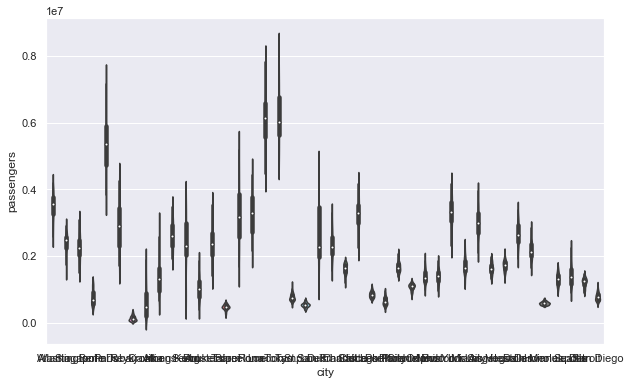

In [186]:
ax = sns.violinplot(x="city", y="passengers",
                    data=df1, palette="muted", split=True ,orient = 45)

# Calculate the 2-sided p-value for a t-test comparing the two destinations

In [20]:
NYCdata = df1[df1['city'] == 'New York City']['passengers']
Otherdata = df1[df1['city'] == 'Phuket']['passengers']

In [23]:
#Here i am calculating a 2sided test comparing the p-value for both destination
from scipy import stats

stats.ttest_ind(NYCdata, Otherdata, equal_var=False)[1]

9.566013587153424e-108

In [ ]:
#Definition:
What is p-value?

Why do we perform a two sided t-test?


# Visualization of Anova Test Results

In [24]:
from plotly.tools import FigureFactory as FF

In [28]:
anova_test

city  passengers
0           Atlanta     2735491
1        Washington     1929494
2         Singapore     1681005
3            Berlin      489487
4             Paris     4154249
...             ...         ...
4963  New York City     3794306
4964    Minneapolis     1295947
4965    Los Angeles     3491734
4966    Los Angeles     3491734
4967          Miami     2267294

[4968 rows x 2 columns]

In [29]:
anova_test.shape

(4968, 2)

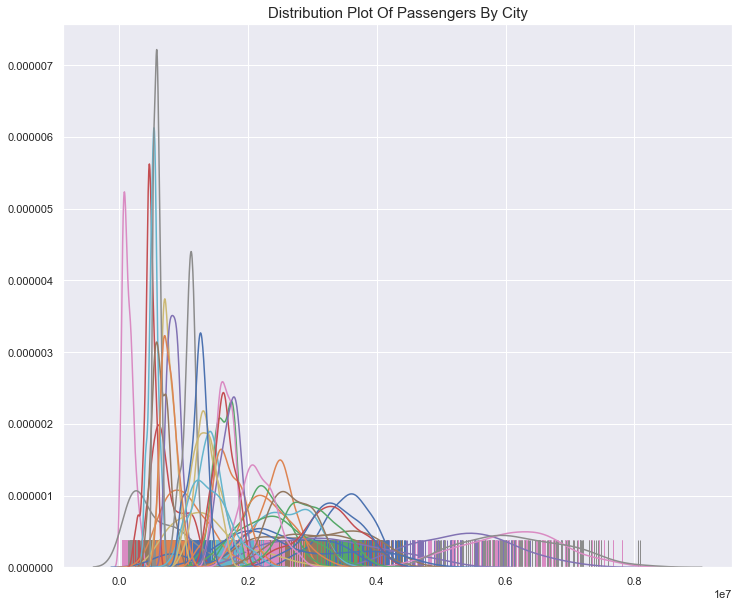

In [31]:
unique_vals = anova_test['city'].unique()

#use a list to create list of sliced Dataframes
targets = [anova_test.loc[anova_test['city'] == val] for val in unique_vals]
#iterate through list and plot the sliced dataframe
for target in targets:
    sns.distplot(target[['passengers']] , hist=False, rug=True)
    
sns.set(rc={'figure.figsize':(12,10)})
plt.title("Distribution Plot Of Passengers By City", fontsize = 15)
plt.show()

# Scaling of Dataframe

In [10]:
df0 = df1.copy()

In [11]:
df01 = df1.copy()

In [ ]:
#normalising

In [12]:
df0.isna().any()

ds                      False
city                    False
passengers              False
type                    False
month                   False
year                    False
temperature_mean        False
precipitation           False
rain_days               False
pressure                False
cost_of_living_index    False
population              False
city_ascii              False
lat                     False
lng                     False
country                 False
iso2                    False
iso3                    False
dtype: bool

In [13]:
from sklearn.preprocessing import StandardScaler as scaler

In [15]:
ss = scaler()

In [16]:
#Renaming columns
df1.rename(columns = {'ds' : 'date'}, inplace = True)

In [52]:
df1.columns

Index(['date', 'city', 'passengers', 'type', 'month', 'year',
       'temperature_mean', 'precipitation', 'rain_days', 'pressure',
       'cost_of_living_index', 'population', 'city_ascii', 'lat', 'lng',
       'country', 'iso2', 'iso3'],
      dtype='object')

In [17]:
scaled_df = pd.DataFrame((df1['passengers'] - df1['passengers'].mean()/ df1['passengers'].std()))
scaled_df.head()

passengers
0  2.735490e+06
1  1.929493e+06
2  1.681004e+06
3  4.894856e+05
4  4.154248e+06

In [18]:
scaled_df['temperature_mean'] = (df1['temperature_mean'] - df1['temperature_mean'].mean()) / df1['temperature_mean'].std()
scaled_df['precipitation'] = (df1['precipitation'] - df1['precipitation'].mean()) / df1['precipitation'].std()
scaled_df['rain_days'] = (df1['rain_days'] - df1['rain_days'].mean()) / df1['rain_days'].std()
scaled_df['pressure'] = (df1['pressure'] - df1['pressure'].mean()) / df1['pressure'].std()
scaled_df['cost_of_living_index'] = (df1['cost_of_living_index'] - df1['cost_of_living_index'].mean()) / df1['cost_of_living_index'].std()
scaled_df['population'] = (df1['population'] - df1['population'].mean()) / df1['population'].std()
scaled_df['date'] = df1['date']
scaled_df['city'] = df1['city']
scaled_df['type'] = df1['type']
scaled_df['month'] = df1['month']
scaled_df['year'] = df1['year']

scaled_df.head()

passengers  temperature_mean  precipitation  rain_days  pressure  \
0  2.735490e+06         -1.465700       0.675845   0.029375  0.898949   
1  1.929493e+06         -1.817862      -0.267331   0.245274  0.312224   
2  1.681004e+06          1.164511      -0.114065   0.245274 -0.756452   
3  4.894856e+05         -2.401130      -0.691761   0.029375 -0.090101   
4  4.154248e+06         -1.795852      -0.514915   0.029375  0.081725   

   cost_of_living_index  population        date        city           type  \
0              1.077087   -0.536458  2010-01-01     Atlanta       Domestic   
1              0.902155   -0.509404  2010-01-01  Washington       Domestic   
2             -1.112693    0.177998  2010-01-01   Singapore  International   
3              1.967369   -0.071767  2010-01-01      Berlin  International   
4              2.908256    1.006397  2010-01-01       Paris  International   

   month  year  
0      1  2010  
1      1  2010  
2      1  2010  
3      1  2010  
4      1  2010

In [19]:
scaled_mthly_totals = scaled_df.groupby(['date'])['passengers','temperature_mean' , 'precipitation' ,
                    'rain_days' ,'pressure' , 'cost_of_living_index' , 'population'].mean().reset_index()
scaled_mthly_totals.head()

date    passengers  temperature_mean  precipitation  rain_days  \
0  2010-01-01  1.611678e+06         -1.022865      -0.194030  -0.018498   
1  2010-02-01  1.528364e+06         -0.897264      -0.115347  -0.009737   
2  2010-03-01  1.853700e+06         -0.469502       0.107376   0.034590   
3  2010-04-01  1.754830e+06         -0.077147      -0.145846  -0.046763   
4  2010-05-01  1.891036e+06          0.276450      -0.098816  -0.099955   

   pressure  cost_of_living_index  population  
0  0.266405              0.338853    -0.01668  
1 -0.262054              0.338853    -0.01668  
2 -0.015953              0.338853    -0.01668  
3 -0.193509              0.338853    -0.01668  
4 -0.310055              0.338853    -0.01668

# Using Plotly to Plot scaled DataFrame

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=scaled_mthly_totals['date'], 
                         y=scaled_mthly_totals['passengers'], 
                         mode='lines',
                         name='Normalized Average Passenger Volume',
                         line_color = 'rgb(0, 48, 143)'))
fig.add_trace(go.Scatter(x=scaled_mthly_totals['date'], 
                         y=scaled_mthly_totals['temperature_mean'],
                         mode='lines',
                         name='Normalized Average Temperature',
                         line_color='rgb(200,0,100)'))
fig.add_trace(go.Scatter(x=scaled_mthly_totals['date'], 
                         y=scaled_mthly_totals['precipitation'],
                         mode='lines',
                         name='Normalized Average Precipitation',
                         line_color='rgb(77,166,255)'))
fig.add_trace(go.Scatter(x=scaled_mthly_totals['date'], 
                         y=scaled_mthly_totals['rain_days'],
                         mode='lines',
                         name='Normalized Average Rain Days',
                         line_color='rgb(0, 128, 85)'))
fig.add_trace(go.Scatter(x=scaled_mthly_totals['date'], 
                         y=scaled_mthly_totals['pressure'],
                         mode='lines',
                         name='Normalized Average Pressure',
                         line_color='rgb(255,77,77)'))
fig.add_trace(go.Scatter(x=scaled_mthly_totals['date'], 
                         y=scaled_mthly_totals['population'],
                         mode='lines',
                         name='Normalized Average Population',
                         line_color='rgb(200,0,100)'))
fig.add_trace(go.Scatter(x=scaled_mthly_totals['date'], 
                         y=scaled_mthly_totals['cost_of_living_index'],
                         mode='lines',
                         name='Normalized Average Cost of Living Index',
                         line_color='rgb(200,0,100)'))


fig.update_layout(title='Normalized Passenger Volume Activity 2010-2018 vs. Normalized Temperature',
                  xaxis_title='Year')
fig.show()

In [62]:
df1.head()

date        city  passengers           type  month  year  \
0  2010-01-01     Atlanta     2735491       Domestic      1  2010   
1  2010-01-01  Washington     1929494       Domestic      1  2010   
2  2010-01-01   Singapore     1681005  International      1  2010   
3  2010-01-01      Berlin      489487  International      1  2010   
4  2010-01-01       Paris     4154249  International      1  2010   

   temperature_mean  precipitation  rain_days  pressure  cost_of_living_index  \
0               3.6          137.0        7.0   1019.50                100.99   
1               0.4           57.0        8.0   1016.70                 98.19   
2              27.5           70.0        8.0   1011.60                 65.94   
3              -4.9           21.0        7.0   1014.78                115.24   
4               0.6           36.0        7.0   1015.60                130.30   

   population  city_ascii      lat       lng        country iso2 iso3  
0    429193.0     Atlanta  33.7627  -84.4225  United States   US  USA  
1    605085.0  Washington  38.9047  -77.0163  United States   US  USA  
2   5074252.0   Singapore   1.2930  103.8558      Singapore   SG  SGP  
3   3450395.0      Berlin  52.5218   13.4015        Germany   DE  DEU  
4  10460118.0       Paris  48.8667    2.3333         France   FR  FRA

In [72]:
!pip install psutil

# Visualization of Passenger Volume By City

In [21]:
fig = px.line(df1, 
        x="date", 
        y="passengers", 
        title='Passenger Volume by City',
        color='city')

fig.update_layout(xaxis_title='Year',
                  yaxis_title='Number of Passengers')

fig.show()

fig.write_image('volume_by_city.jpeg', scale=2)

# Subset DataFrame for both Domestic And International Flights

In [22]:
domestic_df = df1[df1['type'] == 'Domestic']
international_df = df1[df1['type'] == 'International']

# International Flights Visualization

In [75]:
px.line(international_df , x='date' , y = 'passengers' , title = 'International Passenger Volume' , color = 'city')

# Domestic Flights Visualization

In [77]:
px.line(domestic_df , x = 'date' , y = 'passengers' , title = 'Domestic Passenger Volume' , color = 'city')

# Subset DataFrame for top10 cities

In [79]:
top10cities = df1.groupby('city')['passengers'].mean().sort_values(ascending=False).reset_index()[:10]
top10cities

city    passengers
0          Tokyo  6.156525e+06
1         London  6.107012e+06
2          Paris  5.370523e+06
3        Atlanta  3.519556e+06
4  New York City  3.327171e+06
5      Barcelona  3.267139e+06
6           Rome  3.260747e+06
7        Chicago  3.260544e+06
8    Los Angeles  2.997224e+06
9          Dubai  2.895379e+06

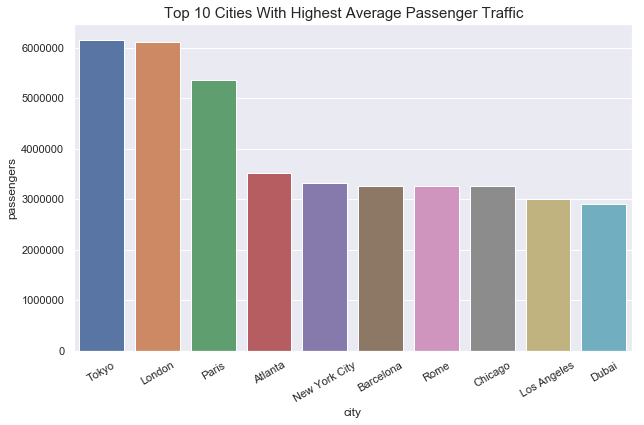

In [80]:
top10cities = sns.barplot(x=top10cities['city'] , y=top10cities['passengers'] , data = top10cities)
top10cities.set_xticklabels(labels = top10cities.get_xticklabels() , rotation = 30)
top10cities.figure.suptitle("Top 10 Cities With Highest Average Passenger Traffic" , y = 0.92 , fontsize = 15)
plt.show()

In [ ]:
top_10 = list(df.groupby(['city'])['PASSENGERS'].mean().sort_values(ascending=False).reset_index().city)[:10]
top_10

In [ ]:
#Creating a list of top 10 cities

In [88]:
top10 = list(df1.groupby(['city'])['passengers'].mean().sort_values(ascending=False).reset_index().city)[:10]
top10

['Tokyo',
 'London',
 'Paris',
 'Atlanta',
 'New York City',
 'Barcelona',
 'Rome',
 'Chicago',
 'Los Angeles',
 'Dubai']

# Visualization of Traffic of Top 10 Airports

In [89]:
px.line(df1[df1['city'].isin(top10)],x='date',y='passengers',title="Passenger Volume Of Top 10 Airports",color='city')

# Visualization of Mean Temperature of All Cities

In [90]:
px.line(df1 , x='date' , y = 'temperature_mean' , title='Temperature of Destinations', color = 'city')

In [95]:
df1.columns

Index(['date', 'city', 'passengers', 'type', 'month', 'year',
       'temperature_mean', 'precipitation', 'rain_days', 'pressure',
       'cost_of_living_index', 'population', 'city_ascii', 'lat', 'lng',
       'country', 'iso2', 'iso3'],
      dtype='object')

In [23]:
monthly_passengers = df1.groupby(['year','month'])['passengers'].mean().reset_index()
monthly_passengers

year  month    passengers
0    2010      1  1.611679e+06
1    2010      2  1.528365e+06
2    2010      3  1.853701e+06
3    2010      4  1.754832e+06
4    2010      5  1.891037e+06
..    ...    ...           ...
103  2018      8  2.890165e+06
104  2018      9  2.563622e+06
105  2018     10  2.653162e+06
106  2018     11  2.431573e+06
107  2018     12  2.465314e+06

[108 rows x 3 columns]

In [98]:
px.bar(monthly_passengers , x = 'month' , y = 'passengers' , title='Average Passenger Volume by Month')

In [100]:
monthly_passengers1 = monthly_passengers.copy()

In [ ]:
# monthly_passengers1[monthly_passengers1['month'] == 1]['passengers'] , name = 'January'
# monthly_passengers1[monthly_passengers1['month'] == 2]['passengers'] , name = 'February'
# monthly_passengers1[monthly_passengers1['month'] == 3]['passengers'] , name = 'March'
# monthly_passengers1[monthly_passengers1['month'] == 4]['passengers'] , name = 'April'
# monthly_passengers1[monthly_passengers1['month'] == 5]['passengers'] , name = 'May'
# monthly_passengers1[monthly_passengers1['month'] == 6]['passengers'] , name = 'June'
# monthly_passengers1[monthly_passengers1['month'] == 7]['passengers'] , name = 'July'
# monthly_passengers1[monthly_passengers1['month'] == 8]['passengers'] , name = 'August'
# monthly_passengers1[monthly_passengers1['month'] == 9]['passengers'] , name = 'September'
# monthly_passengers1[monthly_passengers1['month'] == 10]['passengers'] , name = 'October'
# monthly_passengers1[monthly_passengers1['month'] == 11]['passengers'] , name = 'November'
# monthly_passengers1[monthly_passengers1['month'] == 12]['passengers'] , name = 'December'


In [163]:
!conda install -c plotly plotly-orca psutil requests

Solving environment: done

# All requested packages already installed.



In [24]:
color_continuous_scale = px.colors.diverging.BrBG

In [25]:
fig = go.Figure()
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['month'] == 1]['passengers'], name='January',
                marker_color = '#33BBFF'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['month'] == 2]['passengers'], name = 'February',
                marker_color = '#3393FF'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['month'] == 3]['passengers'], name = 'March',
                marker_color = '#3377FF'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['month'] == 4]['passengers'], name = 'April',
                marker_color = 'darkblue'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['month'] == 5]['passengers'], name = 'May',
                marker_color = 'rgb(107,174,214)'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['month'] == 6]['passengers'], name = 'June',
                marker_color = '#FFC433'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['month'] == 7]['passengers'], name = 'July',
                marker_color = '#FF851B'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['month'] == 8]['passengers'], name = 'August',
                marker_color = '#FF7D33'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['month'] == 9]['passengers'], name = 'September',
                marker_color = '#FFC133'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['month'] == 10]['passengers'], name = 'October',
                marker_color = '#E0FF33'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['month'] == 11]['passengers'], name = 'November',
                marker_color = '#339FFF'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['month'] == 12]['passengers'], name = 'December',
                marker_color = '#3D9970'))

fig.update_layout(title='Monthly Average Passenger Volume',
                  xaxis_title='Month',
                  yaxis_title='Number of Passengers')
fig.show()

fig.write_image('monthly_boxplot.jpeg', scale=2)

In [ ]:
# px.line(df.groupby(['Year', 'city'])['PASSENGERS'].mean().reset_index(), x="Year", y="PASSENGERS", title='Average Passenger Volume by Year', color='city')
# px.scatter(df.groupby(['city'])['PASSENGERS', 'population'].


# Visualization of Total Passenger Volume By year For Cities

In [114]:
px.line(df1.groupby(['year', 'city'])['passengers'].sum().reset_index() , x='year', y="passengers",title='Total Passengers', color = 'city')

# Visualization of Average Passengers Volume Each Year for Top Cities

In [118]:
px.line(df1.groupby(['year','city'])['passengers'].mean().reset_index(),x='year',y='passengers',title='Average Passengers Volume By Year',color='city')

# Visualization of Population VS Passenger Volume

In [121]:
px.scatter(df1.groupby(['city'])['passengers','population'].mean().reset_index() , x='population' , y = 'passengers' 
        ,title = 'Population VS Passenger Volume' , color = 'city')

# Visualization of Population VS Temperature

In [127]:
px.scatter(df1.groupby(['city'])['passengers','temperature_mean'].mean().reset_index(),x= 'temperature_mean' ,
           y = 'passengers', title = 'Population Vs Temperature Mean' , color = 'city')

# Visualization of Population VS Cost of Living Index 

In [128]:
px.scatter(df1 , x ='population', y = 'cost_of_living_index', color = 'city' , 
          size = 'passengers', hover_data=['city'], title="Population vs Cost of Living")

# Finding categorical columns

In [136]:
cat_cols = list(set(df1.columns) - set(df1._get_numeric_data().columns))
cat_cols

['type', 'date', 'city_ascii', 'city', 'country', 'iso2', 'iso3']

# Finding numerical columns

In [137]:
num_cols = list(df1._get_numeric_data().columns)
num_cols

['passengers',
 'month',
 'year',
 'temperature_mean',
 'precipitation',
 'rain_days',
 'pressure',
 'cost_of_living_index',
 'population',
 'lat',
 'lng']

### Create a new dataframe by subsetting for only numerical columns in DataFrame

In [138]:
df_num = df1[['passengers','temperature_mean','precipitation','rain_days','pressure','cost_of_living_index','population']]
df_num.head()

passengers  temperature_mean  precipitation  rain_days  pressure  \
0     2735491               3.6          137.0        7.0   1019.50   
1     1929494               0.4           57.0        8.0   1016.70   
2     1681005              27.5           70.0        8.0   1011.60   
3      489487              -4.9           21.0        7.0   1014.78   
4     4154249               0.6           36.0        7.0   1015.60   

   cost_of_living_index  population  
0                100.99    429193.0  
1                 98.19    605085.0  
2                 65.94   5074252.0  
3                115.24   3450395.0  
4                130.30  10460118.0

In [139]:
#checking correlation of variables
df_num.corr()

passengers  temperature_mean  precipitation  rain_days  \
passengers              1.000000          0.126028      -0.062187  -0.106616   
temperature_mean        0.126028          1.000000       0.178382  -0.083674   
precipitation          -0.062187          0.178382       1.000000   0.715730   
rain_days              -0.106616         -0.083674       0.715730   1.000000   
pressure                0.076016         -0.397860      -0.192996  -0.181646   
cost_of_living_index    0.248047         -0.191358      -0.052441   0.097523   
population              0.579365          0.082865       0.065644   0.006874   

                      pressure  cost_of_living_index  population  
passengers            0.076016              0.248047    0.579365  
temperature_mean     -0.397860             -0.191358    0.082865  
precipitation        -0.192996             -0.052441    0.065644  
rain_days            -0.181646              0.097523    0.006874  
pressure              1.000000              0.117880   -0.124421  
cost_of_living_index  0.117880              1.000000   -0.034088  
population           -0.124421             -0.034088    1.000000

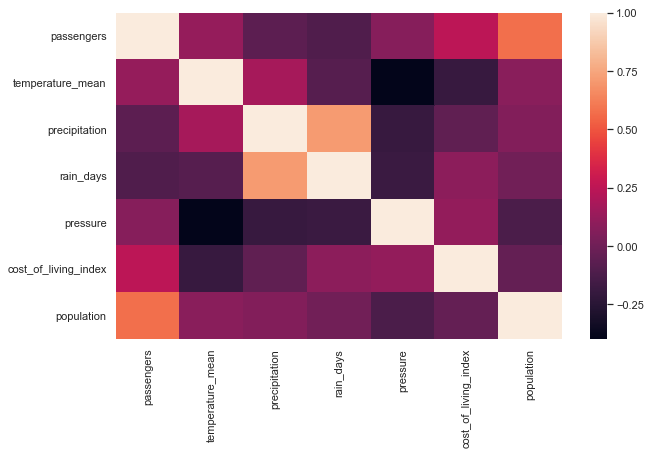

In [140]:
#Plot heatmap for correlation
sns.heatmap(df_num.corr())

### Improve Correlation Matrix

In [141]:
target = 'passengers'

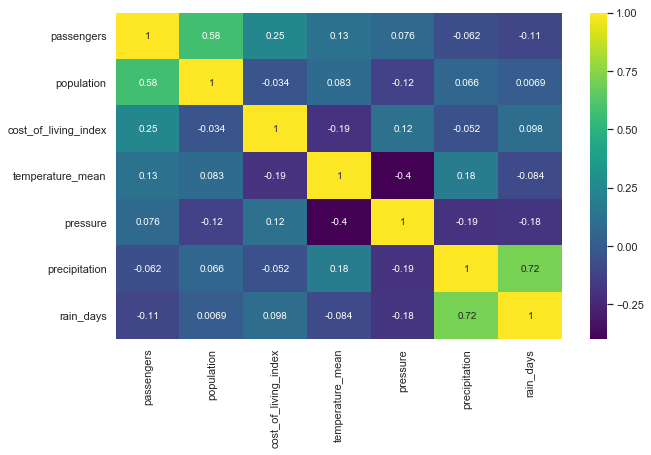

In [151]:
k = 15
cols = df_num.corr().nlargest(k, target)[target].index
cm = df_num[cols].corr()
plt.figure(figsize = (10 , 6))
sns.heatmap(cm , annot = True , cmap = 'viridis')
plt.show()

# Distribution Of numeric Variables

### Distribution plot of Passengers

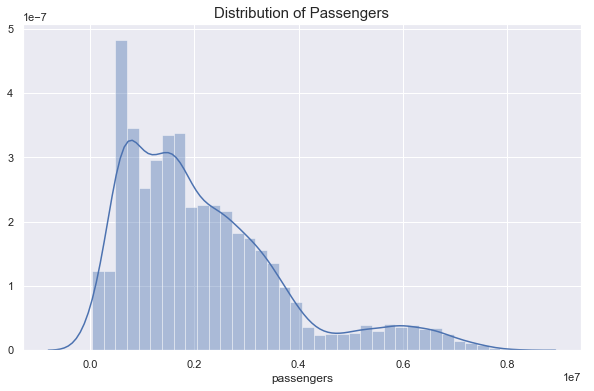

In [148]:
sns.distplot(df1['passengers'])
plt.title('Distribution of Passengers', fontsize = 15)   
plt.show()

### Distribution Plot of Temperature Mean

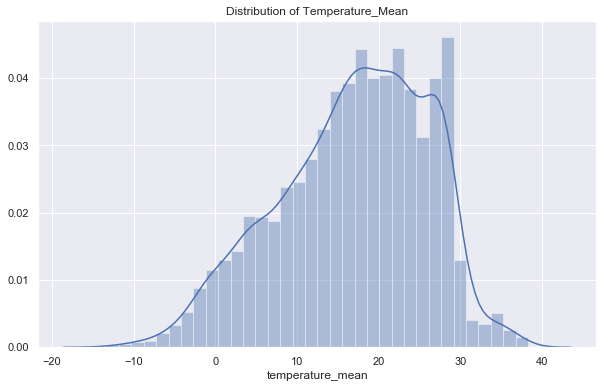

In [149]:
sns.distplot(df1['temperature_mean'])
plt.title("Distribution of Temperature_Mean")
plt.show()

### Distribution Plot of Cost of Index

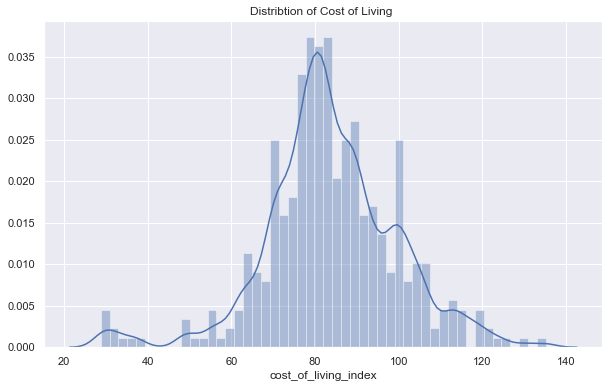

In [155]:
sns.distplot(df1['cost_of_living_index'])
plt.title("Distribtion of Cost of Living ")
plt.show()

### Distribution Plot for precipitation

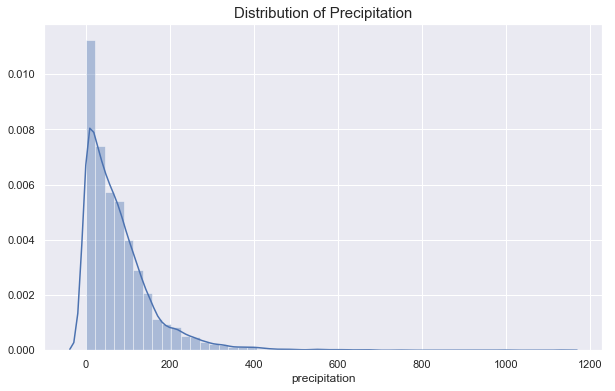

In [154]:
sns.distplot(df1['precipitation'])
plt.title("Distribution of Precipitation" , fontsize = 15)
plt.show()

### Pairpplot of the DataFrame

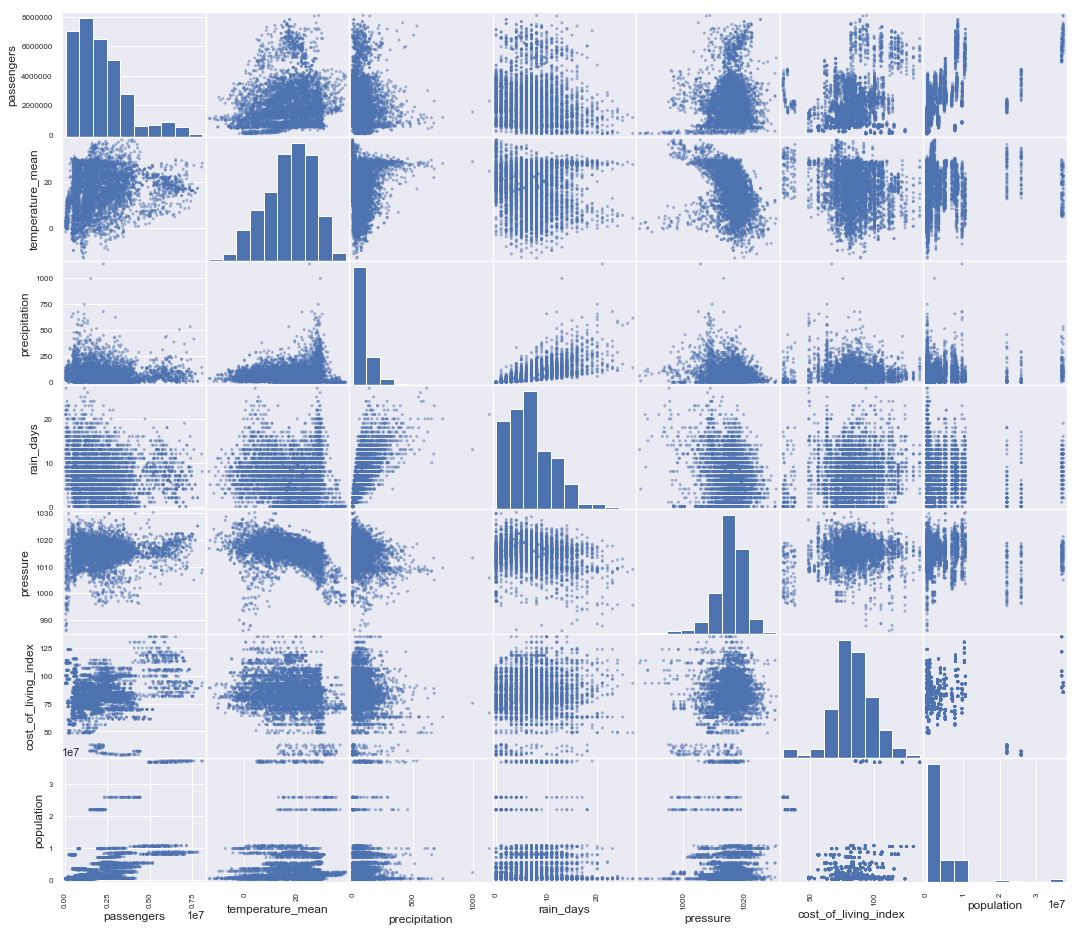

In [157]:
pd.plotting.scatter_matrix(df_num, figsize=[18,16]);

In [ ]:
# !conda install -c plotly plotly-orca psutil requests

# Rolling Average

In [165]:
df1.head()

date        city  passengers           type  month  year  \
0  2010-01-01     Atlanta     2735491       Domestic      1  2010   
1  2010-01-01  Washington     1929494       Domestic      1  2010   
2  2010-01-01   Singapore     1681005  International      1  2010   
3  2010-01-01      Berlin      489487  International      1  2010   
4  2010-01-01       Paris     4154249  International      1  2010   

   temperature_mean  precipitation  rain_days  pressure  cost_of_living_index  \
0               3.6          137.0        7.0   1019.50                100.99   
1               0.4           57.0        8.0   1016.70                 98.19   
2              27.5           70.0        8.0   1011.60                 65.94   
3              -4.9           21.0        7.0   1014.78                115.24   
4               0.6           36.0        7.0   1015.60                130.30   

   population  city_ascii      lat       lng        country iso2 iso3  
0    429193.0     Atlanta  33.7627  -84.4225  United States   US  USA  
1    605085.0  Washington  38.9047  -77.0163  United States   US  USA  
2   5074252.0   Singapore   1.2930  103.8558      Singapore   SG  SGP  
3   3450395.0      Berlin  52.5218   13.4015        Germany   DE  DEU  
4  10460118.0       Paris  48.8667    2.3333         France   FR  FRA

In [ ]:
#Calculate averages of Passengers and create a Dataframe

In [26]:
averages = pd.DataFrame(df1['passengers'].rolling(window=12, min_periods=3).mean())
averages.head()

passengers
0         NaN
1         NaN
2  2115330.00
3  1708869.25
4  2197945.20

In [27]:
total_monthly= pd.DataFrame(df1.groupby('date')['passengers'].sum())
total_monthly.head()


passengers
date                  
2010-01-01    74137239
2010-02-01    70304808
2010-03-01    85270257
2010-04-01    80722258
2010-05-01    86987700

# Moving average

In [29]:
moving_average = total_monthly.rolling(window=12, min_periods = 3).mean()
moving_average.head()

passengers
date                  
2010-01-01         NaN
2010-02-01         NaN
2010-03-01  76570768.0
2010-04-01  77608640.5
2010-05-01  79484452.4

In [173]:
moving_average.isna().sum()

passengers    2
dtype: int64

# Visualization of Moving Average

In [30]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=moving_average.index,
                        y = moving_average['passengers'],
                        mode = 'lines',
                        name = 'Moving Average'))
fig.add_trace(go.Scatter(x = total_monthly.index,
                        y=total_monthly['passengers'],
                        mode='lines',
                        name = 'Passenger Volume',
                        line_color = '#E50061'))

fig.update_layout(title='Average Passenger Volume Activity 2010-2018',
                 xaxis_title='Year',
                 yaxis_title='Number of Passengers')
fig.show()

fig.write_image('total_activity.jpeg' , scale=2)

# Observation :

- We can see that there is a deterministic trend that consistently increased, and it is global (applies to the whole time series). ADDITIVE . We can also see that there is some seasonality in the uptrend of the data

## Non-stationarity - Also there is Non-stationarity in the pattens.
- Increasing trend leads to non-constant mean
- Covariance is non constant with time
- There is non-constant variance

# Stationarity Check :

### Rolling Statistics - Visually stationarity check
- It is also called the moving average
- It is the unweighted mean of the last n values
- it can find trends that are hard to detect.

### Dickey Fuller Test - Statisitical Stationarity Check 
- Checks the null hypothesis ($H_{0}$) by checking that the time series has root and is stationary else it rejects the  null
  hypothesis - $H_{0}$ 
- Checks for the condition if test statistic is less than critical value: Reject $H_{0}$ .  

# Removal of Non Stationarity
- Differencing
- Decomposition

### note : test Stats are made as close to stationary as possible using these techniques

# Plotting Cost of Living Index

In [179]:
px.line(df1,
       x='year',
       y="cost_of_living_index",
       title='Cost of Living Index',
       color = 'city'
       )

# Map

In [31]:
import plotly.graph_objects as go

In [32]:
df1[df1['city'] == 'Athens']

date    city  passengers           type  month  year  \
8     2010-01-01  Athens      713100  International      1  2010   
54    2010-02-01  Athens      665100  International      2  2010   
102   2010-03-01  Athens      809000  International      3  2010   
161   2010-04-01  Athens      939600  International      4  2010   
200   2010-05-01  Athens     1141600  International      5  2010   
...          ...     ...         ...            ...    ...   ...   
4748  2018-08-01  Athens     2889200  International      8  2018   
4809  2018-09-01  Athens     2557800  International      9  2018   
4832  2018-10-01  Athens     2207100  International     10  2018   
4909  2018-11-01  Athens     1623600  International     11  2018   
4948  2018-12-01  Athens     1555400  International     12  2018   

      temperature_mean  precipitation  rain_days  pressure  \
8                  4.4          157.0        5.0    1019.0   
54                 4.1          107.0        7.0    1015.0   
102               11.0           61.0        6.0    1013.4   
161               17.7           47.0        3.0    1016.5   
200               22.5          150.0        7.0    1016.4   
...                ...            ...        ...       ...   
4748              26.0          111.0        7.0    1018.4   
4809              26.5           44.0        7.0    1017.7   
4832              19.1          108.0        5.0    1018.8   
4909               9.6          187.0       12.0    1019.4   
4948               8.6          277.0       13.0    1019.5   

      cost_of_living_index  population city_ascii      lat      lng country  \
8                    71.36   3179434.0     Athens  37.9833  23.7333  Greece   
54                   71.36   3179434.0     Athens  37.9833  23.7333  Greece   
102                  71.36   3179434.0     Athens  37.9833  23.7333  Greece   
161                  71.36   3179434.0     Athens  37.9833  23.7333  Greece   
200                  71.36   3179434.0     Athens  37.9833  23.7333  Greece   
...                    ...         ...        ...      ...      ...     ...   
4748                 64.67   3179434.0     Athens  37.9833  23.7333  Greece   
4809                 64.67   3179434.0     Athens  37.9833  23.7333  Greece   
4832                 64.67   3179434.0     Athens  37.9833  23.7333  Greece   
4909                 64.67   3179434.0     Athens  37.9833  23.7333  Greece   
4948                 64.67   3179434.0     Athens  37.9833  23.7333  Greece   

     iso2 iso3  
8      GR  GRC  
54     GR  GRC  
102    GR  GRC  
161    GR  GRC  
200    GR  GRC  
...   ...  ...  
4748   GR  GRC  
4809   GR  GRC  
4832   GR  GRC  
4909   GR  GRC  
4948   GR  GRC  

[108 rows x 18 columns]

# Group city Averages

In [33]:
grouped_city_averages = df1.groupby(['city','type'])['passengers','lat','lng'].mean().reset_index().sort_values(by='passengers', ascending=False)
grouped_city_averages.head()

city           type    passengers      lat        lng
40          Tokyo  International  6.156525e+06  35.6850  139.75140
18         London  International  6.107012e+06  47.2350  -40.68335
24          Paris  International  5.370523e+06  48.8667    2.33330
2         Atlanta       Domestic  3.519556e+06  33.7627  -84.42250
22  New York City       Domestic  3.327171e+06  40.6943  -73.92490

# Visualization of Group city Averages World-wide


In [34]:
grouped_city_averages['text'] = grouped_city_averages['city'] + '<br>Average Monthly Arriving Passengers ' + (grouped_city_averages['passengers']/1e6).astype(str)+' million'
limits = [(0,3),(4,10),(11,20),(21,30),(31,41)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
text = ['Top 3', '4-10', '11-20', '21-30', '31-41']
cities = []
scale = 10000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = grouped_city_averages[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'ISO-3',
        lon = df_sub['lng'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['passengers']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0]+1,lim[1]+1)))

fig.update_layout(
        title_text = 'Average Arriving Passenger Volume of Destinations',
        showlegend = True,
        geo = dict(
#             showocean= True,
#             oceancolor='#3399FF',
            showlakes = True,
            showcountries = True,
            countrycolor = '#ffffff',
            coastlinecolor = '#ffffff',
            showsubunits = True,
            subunitcolor = '#ffffff',
            framecolor = '#ffffff',
            scope = 'world',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

fig.write_image('world_graph.jpeg', scale=5) 

# Group City Averages for Domestic Flights

In [307]:
### Subset the DataFrame for Domestic Flights only

domesticdf = grouped_city_averages[grouped_city_averages['type'] == 'Domestic']
domesticdf

city      type    passengers       lat        lng  \
2          Atlanta  Domestic  3.519556e+06  33.76270  -84.42250   
22   New York City  Domestic  3.327171e+06  40.69430  -73.92490   
7          Chicago  Domestic  3.260544e+06  41.83730  -87.68620   
19     Los Angeles  Domestic  2.997224e+06  -1.67305  -95.38340   
9           Dallas  Domestic  2.681095e+06  32.79360  -96.76620   
41      Washington  Domestic  2.404971e+06  38.90470  -77.01630   
33   San Francisco  Domestic  2.334041e+06  37.75620 -122.44300   
11          Denver  Domestic  2.168543e+06  39.76210 -104.87590   
16         Houston  Domestic  1.717955e+06  29.78690  -95.39050   
20           Miami  Domestic  1.698278e+06  25.78390  -80.21020   
26         Phoenix  Domestic  1.660798e+06  33.57220 -112.08910   
17       Las Vegas  Domestic  1.632442e+06  36.23330 -115.26540   
6        Charlotte  Domestic  1.624532e+06  35.20790  -80.83040   
34         Seattle  Domestic  1.421757e+06  47.62110 -122.32440   
23         Orlando  Domestic  1.389478e+06  28.47720  -81.33690   
5           Boston  Domestic  1.384216e+06  42.31880  -71.08460   
21     Minneapolis  Domestic  1.314430e+06  44.96350  -93.26780   
12         Detroit  Domestic  1.216359e+06  42.38340  -83.10240   
25    Philadelphia  Domestic  1.079329e+06  40.00770  -75.13390   
31  Salt Lake City  Domestic  8.505801e+05  40.77740 -111.93000   
32       San Diego  Domestic  7.808383e+05  32.83120 -117.12250   
39           Tampa  Domestic  7.672723e+05  27.99420  -82.44510   
28        Portland  Domestic  6.467726e+05  44.60720  -96.46075   
15        Honolulu  Domestic  5.880807e+05  21.32940 -157.84600   
37       St. Louis  Domestic  5.351846e+05  38.63580  -90.24510   

                                                 text  
2   Atlanta<br>Average Monthly Arriving Passengers...  
22  New York City<br>Average Monthly Arriving Pass...  
7   Chicago<br>Average Monthly Arriving Passengers...  
19  Los Angeles<br>Average Monthly Arriving Passen...  
9   Dallas<br>Average Monthly Arriving Passengers ...  
41  Washington<br>Average Monthly Arriving Passeng...  
33  San Francisco<br>Average Monthly Arriving Pass...  
11  Denver<br>Average Monthly Arriving Passengers ...  
16  Houston<br>Average Monthly Arriving Passengers...  
20  Miami<br>Average Monthly Arriving Passengers 1...  
26  Phoenix<br>Average Monthly Arriving Passengers...  
17  Las Vegas<br>Average Monthly Arriving Passenge...  
6   Charlotte<br>Average Monthly Arriving Passenge...  
34  Seattle<br>Average Monthly Arriving Passengers...  
23  Orlando<br>Average Monthly Arriving Passengers...  
5   Boston<br>Average Monthly Arriving Passengers ...  
21  Minneapolis<br>Average Monthly Arriving Passen...  
12  Detroit<br>Average Monthly Arriving Passengers...  
25  Philadelphia<br>Average Monthly Arriving Passe...  
31  Salt Lake City<br>Average Monthly Arriving Pas...  
32  San Diego<br>Average Monthly Arriving Passenge...  
39  Tampa<br>Average Monthly Arriving Passengers 0...  
28  Portland<br>Average Monthly Arriving Passenger...  
15  Honolulu<br>Average Monthly Arriving Passenger...  
37  St. Louis<br>Average Monthly Arriving Passenge...

In [325]:
dom = domesticdf.copy()

In [326]:
dom.drop('text' , 1 ,inplace = True)

# Visualization for Domestic Flights

In [327]:
domesticdf['text'] = dom['city'] + '<br>Passengers ' + (df1['passengers']/1e6).astype(str)+' million'
limits = [(0,2),(3,8),(9,15),(16,20),(21,30)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = domesticdf[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lng'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['passengers']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'

        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'Domestic Flight Passenger Volume',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

# Create A Globla map of Top Cities

In [312]:
df1.head()

date        city  passengers           type  month  year  \
0  2010-01-01     Atlanta     2735491       Domestic      1  2010   
1  2010-01-01  Washington     1929494       Domestic      1  2010   
2  2010-01-01   Singapore     1681005  International      1  2010   
3  2010-01-01      Berlin      489487  International      1  2010   
4  2010-01-01       Paris     4154249  International      1  2010   

   temperature_mean  precipitation  rain_days  pressure  cost_of_living_index  \
0               3.6          137.0        7.0   1019.50                100.99   
1               0.4           57.0        8.0   1016.70                 98.19   
2              27.5           70.0        8.0   1011.60                 65.94   
3              -4.9           21.0        7.0   1014.78                115.24   
4               0.6           36.0        7.0   1015.60                130.30   

   population  city_ascii      lat       lng        country iso2 iso3  
0    429193.0     Atlanta  33.7627  -84.4225  United States   US  USA  
1    605085.0  Washington  38.9047  -77.0163  United States   US  USA  
2   5074252.0   Singapore   1.2930  103.8558      Singapore   SG  SGP  
3   3450395.0      Berlin  52.5218   13.4015        Germany   DE  DEU  
4  10460118.0       Paris  48.8667    2.3333         France   FR  FRA

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4968 entries, 0 to 4967
Data columns (total 18 columns):
date                    4968 non-null object
city                    4968 non-null object
passengers              4968 non-null int64
type                    4968 non-null object
month                   4968 non-null int64
year                    4968 non-null int64
temperature_mean        4968 non-null float64
precipitation           4968 non-null float64
rain_days               4968 non-null float64
pressure                4968 non-null float64
cost_of_living_index    4968 non-null float64
population              4968 non-null float64
city_ascii              4968 non-null object
lat                     4968 non-null float64
lng                     4968 non-null float64
country                 4968 non-null object
iso2                    4968 non-null object
iso3                    4968 non-null object
dtypes: float64(8), int64(3), object(7)
memory usage: 698.8+ KB


In [311]:
fig = px.scatter_geo(df, locations="iso3", color="city",
                     hover_name="city", size="PASSENGERS",
                     animation_frame="Year",
                     projection="natural earth")
fig.show()

In [ ]:
##come back here later

In [190]:
df0.head()

ds        city  passengers           type  month  year  \
0  2010-01-01     Atlanta     2735491       Domestic      1  2010   
1  2010-01-01  Washington     1929494       Domestic      1  2010   
2  2010-01-01   Singapore     1681005  International      1  2010   
3  2010-01-01      Berlin      489487  International      1  2010   
4  2010-01-01       Paris     4154249  International      1  2010   

   temperature_mean  precipitation  rain_days  pressure  cost_of_living_index  \
0               3.6          137.0        7.0   1019.50                100.99   
1               0.4           57.0        8.0   1016.70                 98.19   
2              27.5           70.0        8.0   1011.60                 65.94   
3              -4.9           21.0        7.0   1014.78                115.24   
4               0.6           36.0        7.0   1015.60                130.30   

   population  city_ascii      lat       lng        country iso2 iso3  
0    429193.0     Atlanta  33.7627  -84.4225  United States   US  USA  
1    605085.0  Washington  38.9047  -77.0163  United States   US  USA  
2   5074252.0   Singapore   1.2930  103.8558      Singapore   SG  SGP  
3   3450395.0      Berlin  52.5218   13.4015        Germany   DE  DEU  
4  10460118.0       Paris  48.8667    2.3333         France   FR  FRA

In [194]:
df0.drop(columns = ['iso2','iso3'] , inplace=True)

In [196]:
import pylab
import scipy.stats as stats1

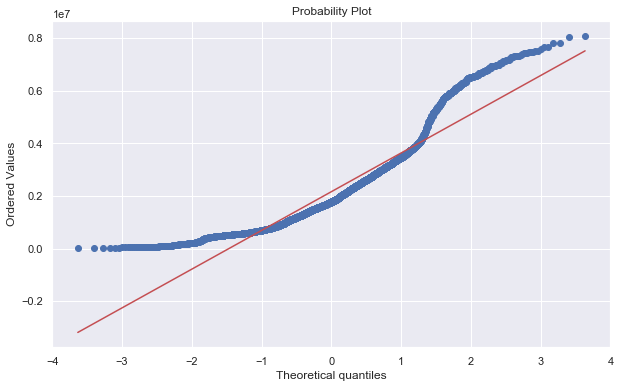

In [197]:
Y = df0.passengers
stats1.probplot(Y, dist="norm", plot=pylab)
pylab.show()

In [ ]:
###################